In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("behavioural_dataset.csv") 

In [3]:
df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,Total Salary,Price
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   Total Salary      99 non-null     int64 
 7   Price             99 non-null     int64 
dtypes: int64(4), object(4)
memory usage: 6.3+ KB


In [5]:
df.describe()

,Age,No of Dependents,Total Salary,Price
count,99.000000,99.000000,9.900000e+01,9.900000e+01
mean,36.313131,2.181818,2.270707e+06,1.194040e+06
std,6.246054,1.335265,1.050777e+06,4.376955e+05
min,26.000000,0.000000,2.000000e+05,1.100000e+05
25%,31.000000,2.000000,1.550000e+06,8.000000e+05
50%,36.000000,2.000000,2.100000e+06,1.200000e+06
75%,41.000000,3.000000,2.700000e+06,1.500000e+06
max,51.000000,4.000000,5.200000e+06,3.000000e+06


In [6]:
df.dropna(inplace=True)
df1 = pd.get_dummies(df, columns=["Profession", "Marrital Status", "Education", "Personal loan"])

In [7]:
scaler = StandardScaler()
df1_scaled = scaler.fit_transform(df1)
df1 = pd.DataFrame(df1_scaled, columns=df1.columns)


In [8]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df1)
    wcss.append(kmeans.inertia_)


D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

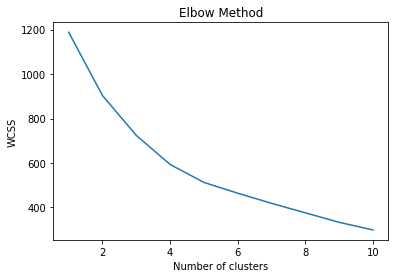

In [9]:
# Plot the Elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [10]:
k = 4
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=10, random_state=0)
df['Cluster'] = kmeans.fit_predict(df1)

D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [11]:
x_feature = 'Total Salary' 
y_feature = 'Price' 

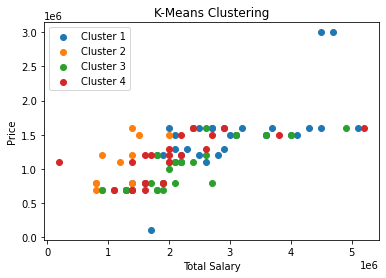

In [13]:
for cluster_label in range(k):  # 'k' is the number of clusters
    cluster_data = df[df['Cluster'] == cluster_label]
    plt.scatter(cluster_data[x_feature], cluster_data[y_feature], label=f'Cluster {cluster_label + 1}')
    
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.title('K-Means Clustering')
plt.legend()
plt.show()    


In [14]:
(df['Cluster'].values==0).sum()

36

In [15]:
cluster_1_data = df[df['Cluster'] == 1]
mean_price_cluster_1 = cluster_1_data['Price'].mean()
print(f"Mean price of Cluster 1: {mean_price_cluster_1}")


Mean price of Cluster 1: 1040000.0


In [16]:
cluster_1_data = df[df['Cluster'] == 1]


most_common_profession = cluster_1_data['Profession'].value_counts().idxmax()
print(f"The most common profession in Cluster 1 is: {most_common_profession}")

The most common profession in Cluster 1 is: Salaried


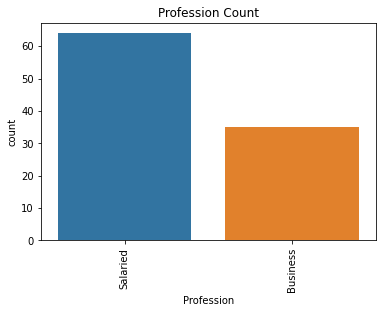

In [17]:
import seaborn as sns

sns.countplot(x='Profession', data=df)
plt.title('Profession Count')
plt.xticks(rotation=90)
plt.show()

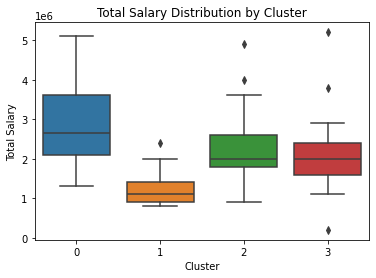

In [18]:
sns.boxplot(x='Cluster', y='Total Salary', data=df)
plt.title('Total Salary Distribution by Cluster')
plt.show()

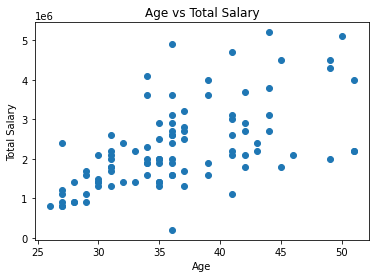

In [19]:
plt.scatter(df['Age'], df['Total Salary'])
plt.title('Age vs Total Salary')
plt.xlabel('Age')
plt.ylabel('Total Salary')
plt.show()

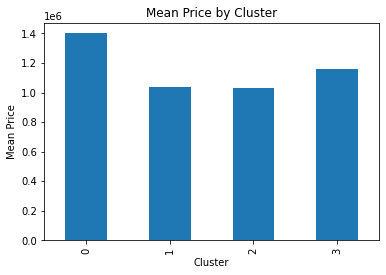

In [20]:
cluster_mean_price = df.groupby('Cluster')['Price'].mean()
cluster_mean_price.plot(kind='bar')
plt.title('Mean Price by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean Price')
plt.show()

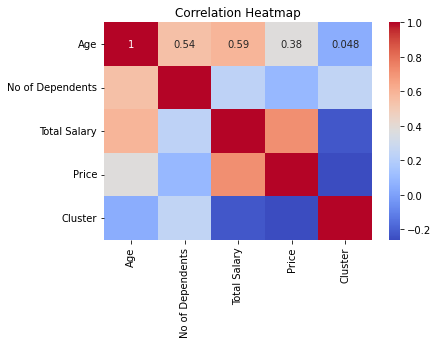

In [21]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

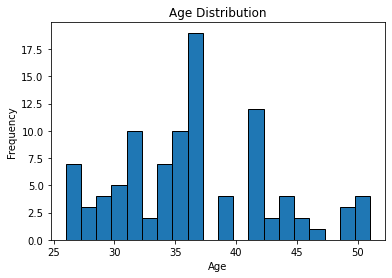

In [22]:
plt.hist(df['Age'], bins=20, edgecolor='k')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()